<ipython-input-2-521597300c4b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['Prices'] = subset_data['Prices'].str.replace('₹', '').str.replace(',', '')
<ipython-input-2-521597300c4b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['Prices'] = pd.to_numeric(subset_data['Prices'], errors='coerce')
<ipython-input-2-521597300c4b>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



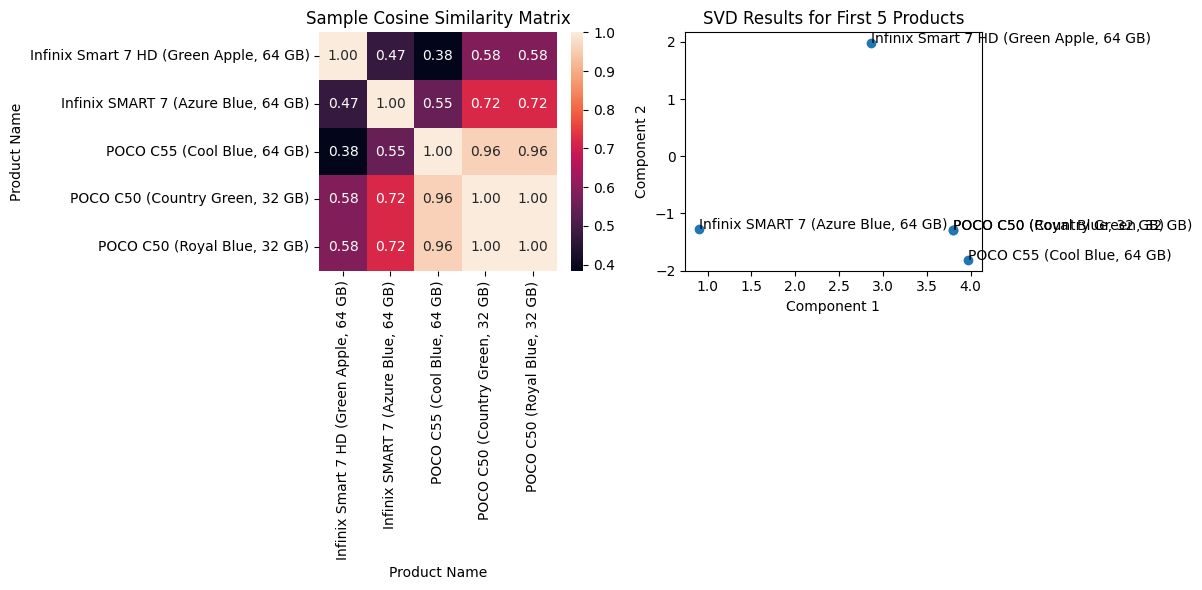

Top-5 Recommendations for: Infinix Smart 7 HD (Green Apple, 64 GB)
- Infinix HOT 30i (Glacier Blue, 64 GB) (Similarity: 0.960)
- Infinix HOT 30i (Diamond White, 64 GB) (Similarity: 0.960)
- Infinix HOT 30i (Mirror Black, 64 GB) (Similarity: 0.960)
- Infinix HOT 30i (Marigold, 64 GB) (Similarity: 0.960)
- REDMI A1+ (Black, 32 GB) (Similarity: 0.887)

SVD Results (First 5 Products):
Infinix Smart 7 HD (Green Apple, 64 GB): Component 1 = 2.860, Component 2 = 1.978
Infinix SMART 7 (Azure Blue, 64 GB): Component 1 = 0.898, Component 2 = -1.275
POCO C55 (Cool Blue, 64 GB): Component 1 = 3.972, Component 2 = -1.813
POCO C50 (Country Green, 32 GB): Component 1 = 3.798, Component 2 = -1.287
POCO C50 (Royal Blue, 32 GB): Component 1 = 3.798, Component 2 = -1.287


In [2]:
# Import required libraries
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and Preprocess Data
# Load the dataset
file_path = 'Products_1 (1).csv'  # Replace with the actual path
data = pd.read_csv(file_path)

# Extract first 50 rows of the dataset
subset_data = data.head(50)

# Clean and preprocess relevant columns
subset_data['Prices'] = subset_data['Prices'].str.replace('₹', '').str.replace(',', '')
subset_data['Prices'] = pd.to_numeric(subset_data['Prices'], errors='coerce')

subset_data['Rating'] = pd.to_numeric(subset_data['Rating'], errors='coerce')

subset_data['Number of Review'] = subset_data['Number of Review'].str.replace(',', '')
subset_data['Number of Review'] = pd.to_numeric(subset_data['Number of Review'], errors='coerce')

# Drop rows with missing values in critical columns
subset_data = subset_data.dropna(subset=['Prices', 'Rating', 'Number of Review'])

# Standardize numerical columns using StandardScaler
scaler = StandardScaler()
numeric_data = subset_data[['Prices', 'Rating', 'Number of Review']]
scaled_data = scaler.fit_transform(numeric_data)

# Step 2: Calculate Cosine Similarity Matrix
cosine_sim_matrix = cosine_similarity(scaled_data)
similarity_df = pd.DataFrame(
    cosine_sim_matrix,
    index=subset_data['Product Name'],
    columns=subset_data['Product Name']
)

# Step 3: Recommendation Function
def get_recommendations(product_name, similarity_matrix, product_names, top_n=5):
    """
    Get top-N product recommendations based on cosine similarity.
    """
    if product_name not in product_names:
        return f"Product '{product_name}' not found in the dataset."

    product_idx = product_names.index(product_name)
    similarity_scores = similarity_matrix[product_idx]
    similar_indices = np.argsort(similarity_scores)[::-1][1:top_n + 1]
    similar_products = [(product_names[i], similarity_scores[i]) for i in similar_indices]
    return similar_products

# Example Usage: Get top-5 recommendations for the first product
product_names = similarity_df.index.tolist()
example_product = product_names[0]  # First product in the dataset
recommendations = get_recommendations(example_product, cosine_sim_matrix, product_names, top_n=5)

# Step 4: Singular Value Decomposition (SVD) for Dimensionality Reduction
svd = TruncatedSVD(n_components=2)
svd_result = svd.fit_transform(cosine_sim_matrix)

# Step 5: Visualization of Results
# Cosine Similarity Heatmap (First 5 Products)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(similarity_df.iloc[:5, :5], annot=True, fmt=".2f", ax=axes[0])
axes[0].set_title("Sample Cosine Similarity Matrix")

# Scatter plot for SVD components
x, y = svd_result[:5, 0], svd_result[:5, 1]
axes[1].scatter(x, y)
for i, txt in enumerate(product_names[:5]):
    axes[1].annotate(txt, (x[i], y[i]))
axes[1].set_title("SVD Results for First 5 Products")
axes[1].set_xlabel("Component 1")
axes[1].set_ylabel("Component 2")

plt.tight_layout()
plt.show()

# Step 6: Display Results
print("Top-5 Recommendations for:", example_product)
for product, score in recommendations:
    print(f"- {product} (Similarity: {score:.3f})")

print("\nSVD Results (First 5 Products):")
for i, product in enumerate(product_names[:5]):
    print(f"{product}: Component 1 = {svd_result[i, 0]:.3f}, Component 2 = {svd_result[i, 1]:.3f}")

# Step 7: Save Cosine Similarity Matrix to CSV (Optional)
similarity_df.to_csv('cosine_similarity_matrix.csv')



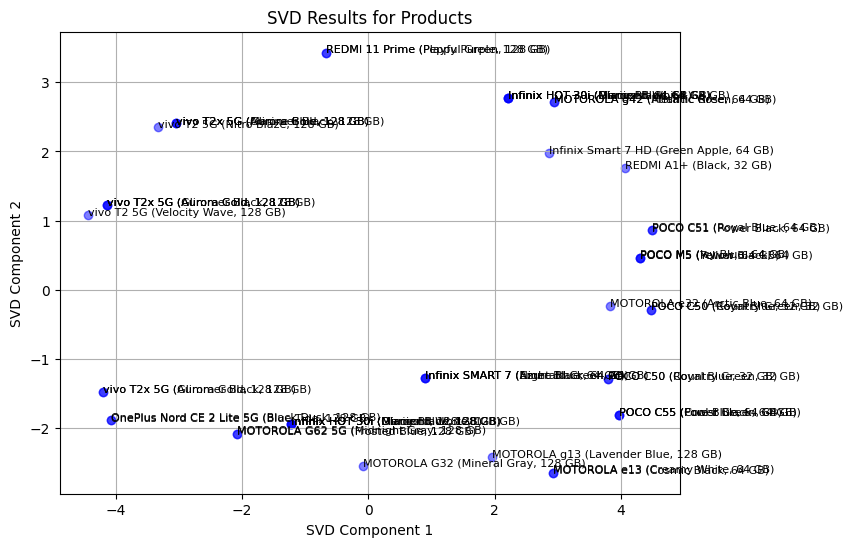

'/mnt/data/svd_results_fixed.png'

In [ ]:
# Re-create and save the SVD visualization correctly
import os

# Ensure directory exists
output_path = "/mnt/data"
os.makedirs(output_path, exist_ok=True)

# Save with a unique filename
svd_visual_fixed_path = "/mnt/data/svd_results_fixed.png"

# Re-plot SVD Visualization
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='blue', alpha=0.5)

# Annotate product names for clarity
for i, txt in enumerate(product_names[:50]):  # Avoid overcrowding; first 50 products only
    plt.annotate(txt, (x[i], y[i]), fontsize=8)

plt.title("SVD Results for Products")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.grid(True)

plt.savefig(svd_visual_fixed_path)  # Save the figure
plt.show()

svd_visual_fixed_path


In [ ]:
ratings_file_path = "structured_user_ratings.xlsx"  # Path to your Excel file

In [ ]:
ratings_file_path = "structured_user_ratings.xlsx"
ratings_data = pd.read_excel(ratings_file_path, index_col=0)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load User-Item Ratings Matrix
ratings_data = pd.read_excel(ratings_file_path, index_col=0)

# Step 2: Handle Missing Values (fill NaN with 0)
ratings_filled = ratings_data.fillna(0)

# Step 3: Calculate Cosine Similarity for Items (Products)
item_similarity_matrix = cosine_similarity(ratings_filled.T)  # Transpose for Item-Item similarity
item_similarity_df = pd.DataFrame(
    item_similarity_matrix,
    index=ratings_filled.columns,
    columns=ratings_filled.columns
)

# Step 4: Recommendation Function for Item-Based Collaborative Filtering
def recommend_similar_items(item_name, similarity_df, top_n=5):
    """
    Recommends the top-N similar items based on cosine similarity for a given product.
    """
    if item_name not in similarity_df.columns:
        return f"Item '{item_name}' not found in the dataset."

    similarity_scores = similarity_df[item_name]
    similar_items = similarity_scores.sort_values(ascending=False)[1:top_n+1]
    return similar_items

# Example: Get top-5 similar products for "Infinix Smart 7 HD"
example_product_cf = "Infinix Smart 7 HD"
top_recommendations_cf = recommend_similar_items(example_product_cf, item_similarity_df)

top_recommendations_cf


,Infinix Smart 7 HD
OPPO Reno10 5G,0.787280
POCO C50,0.577350
Infinix SMART 7,0.518519
POCO C55,0.500370
